<a href="https://www.kaggle.com/code/tamaraabuhawele/predict-smoking-status-rf-dt-accuracy-83?scriptVersionId=117903643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
smoking =pd.read_csv("../input/body-signal-of-smoking/smoking.csv")

In [3]:
smoking.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
X_train = pd.read_csv('../input/body-signal-of-smoking/competition_format/x_train.csv')
X_test = pd.read_csv('../input/body-signal-of-smoking/competition_format/x_test.csv')
y_train = pd.read_csv('../input/body-signal-of-smoking/competition_format/y_train.csv')
y_test = pd.read_csv('../input/body-signal-of-smoking/competition_format/y_test.csv')
#Imorting the competition format gives better accuracy

In [5]:
smoking.drop('ID',axis=1,inplace=True)
#No need for id column

In [6]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [7]:
smoking.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
smoking.corr()['smoking'].sort_values (ascending=False) 

smoking                1.000000
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
ALT                    0.097338
systolic               0.073109
eyesight(right)        0.063017
eyesight(left)         0.061204
AST                    0.059253
Urine protein          0.014267
hearing(right)        -0.018855
hearing(left)         -0.023209
Cholesterol           -0.028548
LDL                   -0.045220
age                   -0.162557
HDL                   -0.178470
Name: smoking, dtype: float64

In [9]:
smoking['oral'].value_counts()
#It going to be deleted

Y    55692
Name: oral, dtype: int64

In [10]:
smoking['tartar'].value_counts()
#it needs encoding

Y    30940
N    24752
Name: tartar, dtype: int64

In [11]:
smoking['gender'].value_counts()
#it needs encoding too

M    35401
F    20291
Name: gender, dtype: int64

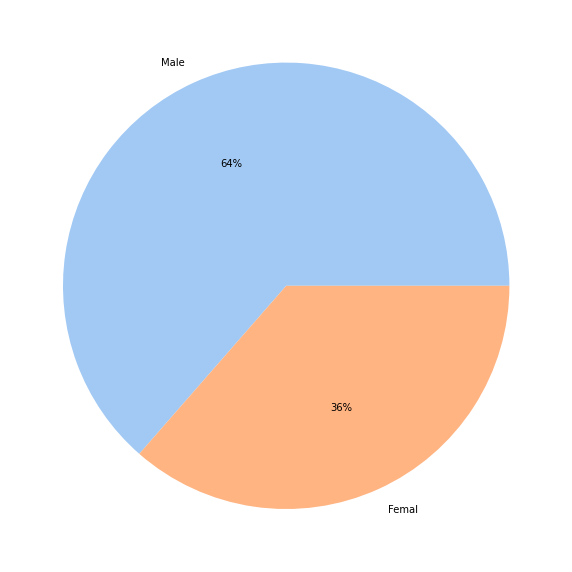

In [12]:
plt.figure(figsize=(10, 15))
data = smoking['gender'].value_counts()
labels =['Male','Femal']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:>

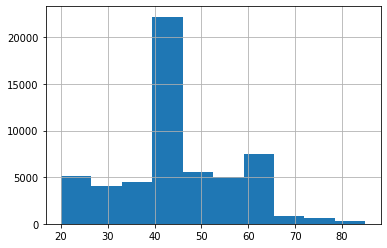

In [13]:
smoking['age'].hist()

<AxesSubplot:xlabel='smoking', ylabel='weight(kg)'>

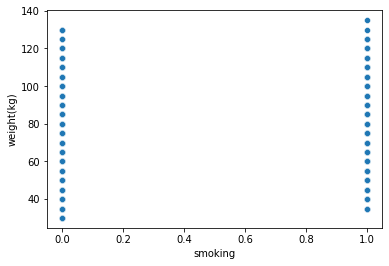

In [14]:
sns.scatterplot(data=smoking,x='smoking',y='weight(kg)')

<AxesSubplot:xlabel='smoking', ylabel='height(cm)'>

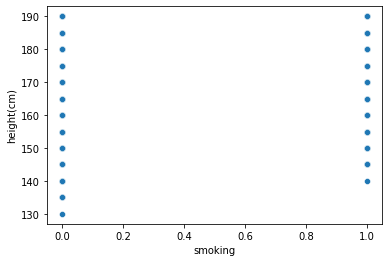

In [15]:
sns.scatterplot(data=smoking,x='smoking',y='height(cm)')

<AxesSubplot:xlabel='age', ylabel='Count'>

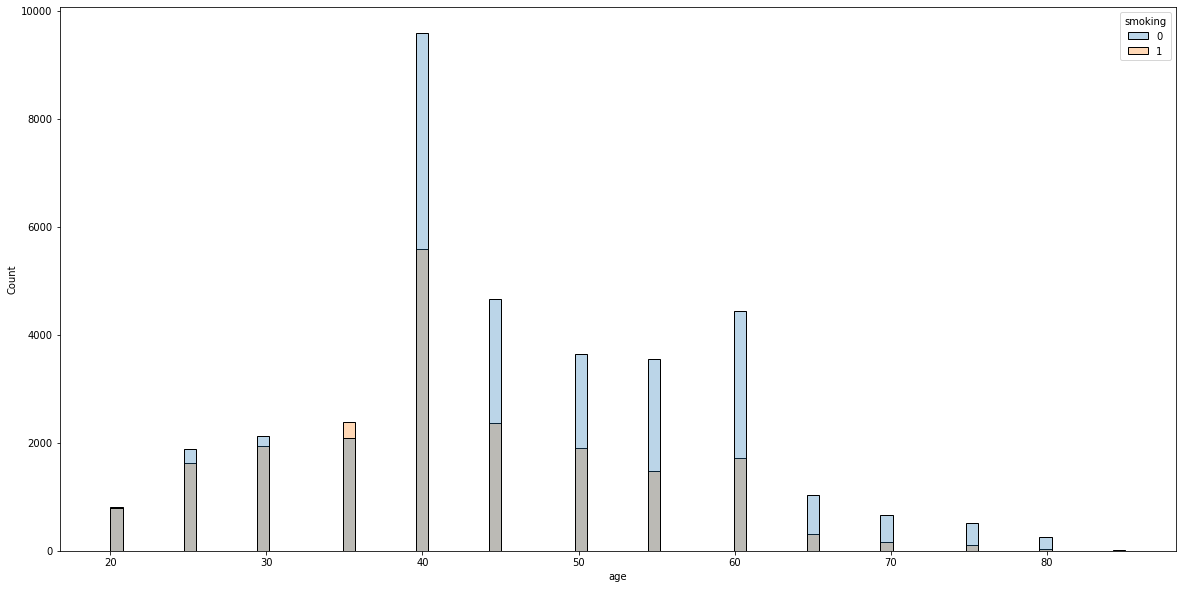

In [16]:
f, ax = plt.subplots(figsize=(20,10))
sns.histplot(x = smoking['age'],hue=smoking['smoking'],alpha=0.3)

<AxesSubplot:xlabel='smoking', ylabel='Urine protein'>

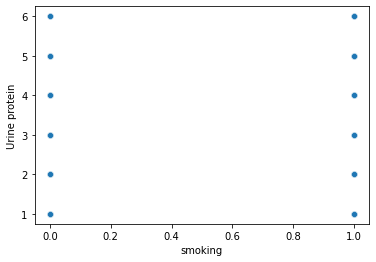

In [17]:
sns.scatterplot(data=smoking,x='smoking',y='Urine protein')

<AxesSubplot:xlabel='smoking', ylabel='count'>

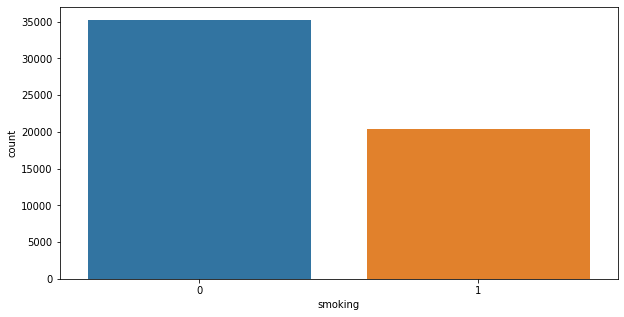

In [18]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='smoking',data=smoking)

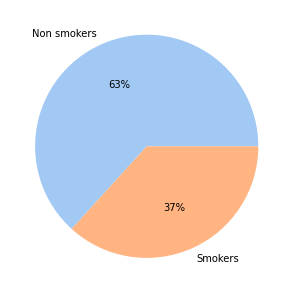

In [19]:
plt.figure(figsize=(5, 10))
data = smoking['smoking'].value_counts()
labels =['Non smokers','Smokers']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='smoking', ylabel='count'>

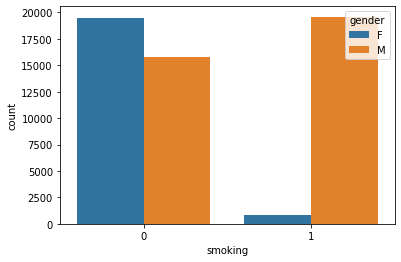

In [20]:
sns.countplot(x = smoking['smoking'],hue=smoking['gender'])

Non smokers are more likely to be females
 and the majority of smokers are males 

# Data Preperation

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(smoking, test_size=0.2, random_state=42, shuffle=True)

In [22]:
xtrain= train.drop(["oral",'smoking'],axis=1)
ytrain = train['smoking'].copy()

In [23]:
xtest= test.drop(["oral",'smoking'],axis=1)
ytest = test['smoking'].copy()

In [24]:
from sklearn.preprocessing import OneHotEncoder
def oneHot(df,column):
    ohe = OneHotEncoder()
    enc = ohe.fit_transform(df[[column]])
    return enc.toarray()
xtrain['gender'] = oneHot(xtrain,'gender')
xtest['gender'] = oneHot(xtest,'gender')
xtrain['tartar'] = oneHot(xtrain,'tartar')
xtest['tartar'] = oneHot(xtest,'tartar')

# Model Building

In [25]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
ypred = DT.predict(xtest)
print("Train Score  : ", DT.score(xtrain,ytrain))
print("Test Score  : ", DT.score(xtest,ytest))
print("Accuracy Score : ",accuracy_score(ytest,ypred)*100)
print("confusion_matrix\n",confusion_matrix(ytest,ypred))
print("classification_report  \n ",classification_report(ytest,ypred))

Train Score  :  1.0
Test Score  :  0.7807702666307568
Accuracy Score :  78.07702666307567
confusion_matrix
 [[5790 1237]
 [1205 2907]]
classification_report  
                precision    recall  f1-score   support

           0       0.83      0.82      0.83      7027
           1       0.70      0.71      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [27]:
rf = RandomForestClassifier(n_estimators=600)
rf.fit(xtrain, ytrain)

ypred = rf.predict(xtest)

print("Train Score  : ", rf.score(xtrain,ytrain))
print("Test Score  : ", rf.score(xtest,ytest))
print("Accuracy Score : ",accuracy_score(ytest,ypred)*100)
print("confusion_matrix   \n",confusion_matrix(ytest,ypred))
print("classification_report\n   ",classification_report(ytest,ypred))

Train Score  :  1.0
Test Score  :  0.8322111500134662
Accuracy Score :  83.22111500134662
confusion_matrix   
 [[5960 1067]
 [ 802 3310]]
classification_report
                  precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.84      0.83      0.83     11139



# 83% accaccurate 